All the necessary imports and so forth

In [133]:
import pandas as pd
import numpy as np

## Use Case
#### You are given given data of a patient that contains several biometric data, and a nurse asks you a way to visualize the heart rate of said patient across time.



This type of data can be quasi-real-time, real-time or static.

In this case, we have the data of a patient that is not longer being monitored. Hence, it is already in a nice and structured csv format.

We already load the data for you, but you are to follow the nurse requirements!
Also, keep in mind that in the real world the requirements change constantly, so expect things to change as you go!

In [134]:
path = "patient.csv" #.csv file of one patient
df = pd.read_csv(path,index_col= 0) #Inspect the csv and read the docs to undersand why we had to set the param index_col = 0
df.index = pd.to_datetime(df.index) #Why do we need to do this?

With the data loaded, you inspect the file, to understand its structure.

In [135]:
df

,steps,heartrate,Weight,bpm,diastolic,irreghr,systolic
2020-07-20 14:29:52.111,NaN,NaN,86.5,NaN,NaN,NaN,NaN
2020-07-20 14:35:15.963,NaN,NaN,NaN,69.0,84.0,0.0,125.0
2020-07-20 14:45:00.000,NaN,73.0,NaN,NaN,NaN,NaN,NaN
2020-07-20 14:47:00.000,NaN,55.0,NaN,NaN,NaN,NaN,NaN
2020-07-20 14:49:00.000,NaN,73.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-08-18 15:16:00.000,NaN,45.0,NaN,NaN,NaN,NaN,NaN
2020-08-18 15:26:00.000,NaN,68.0,NaN,NaN,NaN,NaN,NaN
2020-08-18 15:36:00.000,NaN,67.0,NaN,NaN,NaN,NaN,NaN
2020-08-18 15:46:00.000,NaN,69.0,NaN,NaN,NaN,NaN,NaN


### Exercise 1:
##### The nurse is only interested on the heart rate field.

In [106]:
heart_rate = df["heartrate"]

In [107]:
heart_rate

2020-07-20 14:29:52.111     NaN
2020-07-20 14:35:15.963     NaN
2020-07-20 14:45:00.000    73.0
2020-07-20 14:47:00.000    55.0
2020-07-20 14:49:00.000    73.0
                           ... 
2020-08-18 15:16:00.000    45.0
2020-08-18 15:26:00.000    68.0
2020-08-18 15:36:00.000    67.0
2020-08-18 15:46:00.000    69.0
2020-08-18 15:56:00.000    65.0
Name: heartrate, Length: 8867, dtype: float64

### Exercise 2
##### The nurse wants to see the max, min and average of the patients heartrate

In [108]:
heart_rate.agg([np.min,np.max,np.mean])

amin     41.000000
amax    169.000000
mean     64.026193
Name: heartrate, dtype: float64

### Exercise 2.1
##### The nurse wants to know the max, min and average of the patients heart rate by day

In [110]:
heart_rate.resample("1D").agg([np.min,np.max,np.mean])

,amin,amax,mean
2020-07-20,44.0,101.0,76.948718
2020-07-21,44.0,98.0,70.250000
2020-07-22,41.0,135.0,65.167213
2020-07-23,46.0,155.0,66.514851
2020-07-24,46.0,111.0,61.446667
2020-07-25,47.0,147.0,64.865801
2020-07-26,51.0,114.0,62.252632
2020-07-27,49.0,129.0,60.962963
2020-07-28,45.0,99.0,62.797414
2020-07-29,45.0,131.0,64.834711


### Exercise 2.2
##### The nurse wants to see the max, min and average of the patients heart rate by 3H but only in the last 7 days of measures

In [124]:
mask = (heart_rate.index.max() - heart_rate.index).days <=7


In [127]:
heart_rate.loc[mask].resample("3H").agg([np.min,np.max,np.mean])

,amin,amax,mean
2020-08-10 15:00:00,63.0,87.0,71.107143
2020-08-10 18:00:00,63.0,99.0,76.176471
2020-08-10 21:00:00,49.0,75.0,64.555556
2020-08-11 00:00:00,51.0,70.0,57.540000
2020-08-11 03:00:00,46.0,82.0,53.950000
...,...,...,...
2020-08-18 03:00:00,52.0,75.0,66.566667
2020-08-18 06:00:00,56.0,87.0,67.878788
2020-08-18 09:00:00,57.0,99.0,75.956522
2020-08-18 12:00:00,57.0,86.0,75.444444


### Exercise 2.3
##### The nurse wants to see the max, min and average of the patients heart rate by 3H, but ignoring night time (Between 23 and 8)

In [129]:
mask = (heart_rate.index.hour >=23) | (heart_rate.index.hour <=8)

In [130]:
heart_rate.loc[mask].resample("3H").agg([np.min,np.max,np.mean])

,amin,amax,mean
2020-07-20 21:00:00,64.0,95.0,78.500000
2020-07-21 00:00:00,61.0,86.0,66.465517
2020-07-21 03:00:00,59.0,70.0,63.473684
2020-07-21 06:00:00,60.0,98.0,67.805556
2020-07-21 09:00:00,NaN,NaN,NaN
...,...,...,...
2020-08-17 18:00:00,NaN,NaN,NaN
2020-08-17 21:00:00,56.0,68.0,63.500000
2020-08-18 00:00:00,50.0,76.0,67.550725
2020-08-18 03:00:00,52.0,75.0,66.566667


### Exercise 3.
#### The nurse is complaining that she takes too long to read the numbers on a table, instead she wants a graphic.
Plot only exercises 2.1 and 2.2

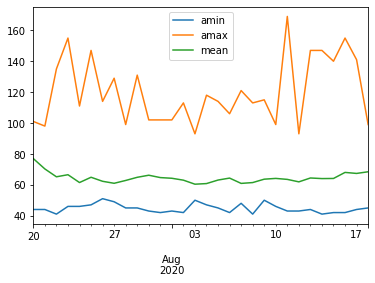

In [132]:
heart_rate.resample("1D").agg([np.min,np.max,np.mean]).plot()

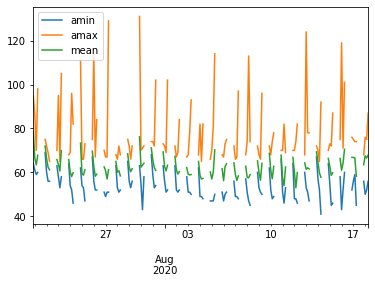

In [131]:
heart_rate.loc[mask].resample("3H").agg([np.min,np.max,np.mean]).plot()

### Exercise 4
#### The nurse is enjoying the plots, but she thinks that they are a bit hard to read.  
##### Use Bokeh to enrich these visualizations!

In [188]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import Legend,LegendItem,Range1d,ColumnDataSource,DatetimeTickFormatter, Text,LabelSet,DateRangeSlider,HoverTool,MultiLine,LinearAxis
from bokeh.layouts import row,column
output_notebook()

ImportError: cannot import name 'Range1D' from 'bokeh.models' (C:\Users\msdc1\Anaconda3\lib\site-packages\bokeh\models\__init__.py)

### Exercise 4.1
#### The nurse wants to visualize the mean of the heart rate each 3H.

In [166]:
res = heart_rate.resample("3H").mean()

In [167]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate")
fig.line(res.keys(),res.values,legend_label="mean",color="orange")
show(fig)

### Exercise 4.2
#### THe nurse now also wants to have the standard deviation present on the plot to understand how much it varies.

In [168]:
res = heart_rate.resample("3H").std(ddof=0)

In [169]:
fig.line(res.keys(),res.values,legend_label="mean",color="orange")
show(fig)

## Exercise 4.3
#### The nurse can not use this plot. She suggests to put the standard deviation as an area around the mean.

In [177]:
mean = heart_rate.resample("3H").mean()

In [186]:
interval = (mean.keys().min(),mean.keys().max())

In [190]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate",x_range=Range1d(start = interval[0],end=interval[1],bounds=interval))
fig.line(mean.keys(),mean.values,legend_label="mean",color="orange")


GlyphRenderer(id='5225', ...)

In [191]:
std = heart_rate.resample("3H").std(ddof=0)

In [192]:
upper = mean+std
lower = mean-std

In [193]:
fig.varea(x=mean.keys(),y1= upper, y2= lower,legend_label="std",color="orange",fill_alpha=0.2)

GlyphRenderer(id='5253', ...)

In [194]:
fig.legend.click_policy="hide" #What is this for?
show(fig)

#### Free-roam ! Play around with the previous code and try to figure out what is going on and answer the following questions!

1. What is that interval variable used for?
2. What happens if you add **tools=""** to the parameters of figure?
3. Try to change 3H to 1H, 1S, 1M, etc. Try stuff and see what happens to the data and respective plots

Feel free to discuss with us any of these questions !

### Exercise 5
#### The nurse stikes again! Now, she wants the plot to differentiate day from night! 
Day  = orange
night = blue

*Hint* Remember the learning books about plotting multiple lines.

*Another hint* A line can only have one color. The same happens for 